Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [1]:
import pandas as pd

In [123]:
data = pd.read_csv('train.csv')

In [124]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [125]:
data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Пропуски присутствуют только в колонках "keyword" и "location"

In [126]:
data = data.fillna('')

In [127]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [128]:
train.target.value_counts()

0    3024
1    2305
Name: target, dtype: int64

0-вого класса примерно на 700 больше. Распределение можно назвать равномерным

In [129]:
import matplotlib.pyplot as plt
import numpy as np

In [137]:
lst = np.array(train['keyword'].value_counts().index[:10])
dct = dict(list(zip(lst, np.arange(10))))
v0 = np.zeros(10)
v1 = np.zeros(10)
for value in train[['keyword', 'target']].values:
    if value[0] in dct:
        if value[1] == 0:
            v0[dct[value[0]]] += 1
        else:
            v1[dct[value[0]]] += 1

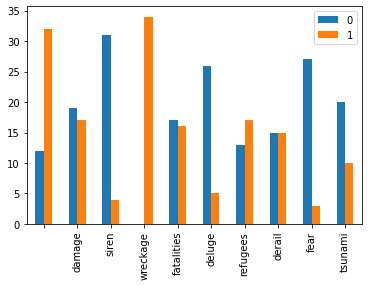

In [138]:
df = pd.DataFrame({0: v0, 1: v1})
df.plot(kind='bar')
plt.xticks(np.arange(10), lst)
plt.show()

Чем чаще встречается "ключевое слово", тем больше вероятность положительного прогноза

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [139]:
train['union'] = data[data.columns[1:4]].apply(lambda x: ' '.join(x), axis=1)
train = train.drop(columns=['id', 'keyword', 'location', 'text'])

test['union'] = data[data.columns[1:4]].apply(lambda x: ' '.join(x), axis=1)
test = test.drop(columns=['id', 'keyword', 'location', 'text'])

In [140]:
train = train.reindex(['union', 'target'], axis="columns")
test.reindex(['union', 'target'], axis="columns")
train

,union,target
1186,bridge%20collapse Ashes 2015: AustraliaÛªs c...,0
4071,"hail Carol Stream, Illinois GREAT MICHIGAN TEC...",1
5461,police Houston CNN: Tennessee movie theater s...,1
5787,rioting Still rioting in a couple of hours le...,1
7445,wounds Lake Highlands Crack in the path where ...,0
...,...,...
5226,obliteration Merica! @Eganator2000 There aren'...,0
5390,panic just had a panic attack bc I don't have...,0
860,blood Omron HEM-712C Automatic Blood Pressure...,0
7603,Officials say a quarantine is in place at an...,1


In [141]:
y_train = train['target']
x_train = train['union']

In [142]:
x_test = test['union']
y_test = test['target']

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [85]:
from sklearn.feature_extraction.text import CountVectorizer

In [86]:
cnt_vec = CountVectorizer()
x_train_transformed = cnt_vec.fit_transform(x_train)

↓↓↓Размер матрицы↓↓↓

In [87]:
x_train_transformed.shape

(5329, 18455)

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [88]:
from string import punctuation

In [89]:
cnt_vec.vocabulary_

{'bridge': 2948,
 '20collapse': 320,
 'ashes': 1928,
 '2015': 295,
 'australia': 2059,
 'ûªs': 18425,
 'collapse': 3914,
 'at': 1977,
 'trent': 16483,
 'among': 1628,
 'worst': 17813,
 'in': 8314,
 'history': 7773,
 'england': 5722,
 'bundled': 3085,
 'out': 11995,
 'for': 6503,
 '60': 755,
 'http': 7970,
 'co': 3861,
 't5trhjuau0': 15733,
 'hail': 7420,
 'carol': 3363,
 'stream': 15419,
 'illinois': 8249,
 'great': 7206,
 'michigan': 10594,
 'technique': 15888,
 'camp': 3261,
 'b1g': 2147,
 'thanks': 16013,
 'to': 16272,
 'bmurph1019': 2753,
 'hail_youtsey': 7421,
 'termn8r13': 15949,
 'goblue': 7088,
 'wrestleon': 17848,
 'oaskgki6qj': 11648,
 'police': 12634,
 'houston': 7933,
 'cnn': 3854,
 'tennessee': 15932,
 'movie': 10940,
 'theater': 16025,
 'shooting': 14647,
 'suspect': 15632,
 'killed': 9246,
 'by': 3150,
 'di8elzswnr': 4890,
 'rioting': 13800,
 'still': 15357,
 'couple': 4204,
 'of': 11708,
 'hours': 7925,
 'left': 9644,
 'until': 16884,
 'have': 7546,
 'be': 2383,
 'up': 

In [90]:
def func(voc):
    count_n = 0
    for elem in voc:
        if any(map(str.isdigit, elem)) == True:
            count_n += 1
    count_p = 0
    for elem in voc:
        if any(map(lambda x: x in punctuation, elem)) == True:
            count_p += 1
    ls = ['#', '@']
    count_h = 0
    for elem in voc:
        if any(map(lambda x: x in ls, elem)) == True:
            count_h += 1

    print("Слов содержащих цифры -", count_n)
    print("Слов содержащих символы пунктуации -", count_p)
    print("Слов содержищих @ и # -", count_h)
    

In [91]:
func(cnt_vec.vocabulary_)

Слов содержащих цифры - 3812
Слов содержащих символы пунктуации - 315
Слов содержищих @ и # - 0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [92]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

In [93]:
tw_vec = CountVectorizer(tokenizer=TweetTokenizer().tokenize)
x_train_transformed = tw_vec.fit_transform(x_train)

In [94]:
func(tw_vec.vocabulary_)

Слов содержащих цифры - 3939
Слов содержащих символы пунктуации - 7338
Слов содержищих @ и # - 3155


Появилось больше слов, содержащих цифры, также число слов с символами пунктуации сильно возросло. Добавились слова с "@" и "#"

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [95]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

In [96]:
def mytokenize(text):
    lw_text = text.lower()

    tw = TweetTokenizer()
    tw_text = tw.tokenize(lw_text)

    def test(word):
        return re.fullmatch('[a-z]+|#[a-z]+|[' + punctuation + ']+[()][' + punctuation + ']*|[' + punctuation + ']*[()][' + punctuation + ']+', word) 

    tk_text = [word for word in tw_text if test(word)]
    tk_text = [word for word in tk_text if word not in stopwords.words('english')]

    stemmer = SnowballStemmer(language='english')
    new_text = [stemmer.stem(w) for w in tk_text]
                            
    return new_text

In [97]:
for i in range(10):
    print(mytokenize(x_train.iloc[i]))

['bridg', 'ash', 'australia', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia']
['hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'thank', '#goblu', '#wrestleon']
['polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic']
['riot', 'still', 'riot', 'coupl', 'hour', 'left', 'class']
['wound', 'lake', 'highland', 'crack', 'path', 'wipe', 'morn', 'beach', 'run', 'surfac', 'wound', 'left', 'elbow', 'right', 'knee']
['airplan', 'somewher', 'expert', 'franc', 'begin', 'examin', 'airplan', 'debri', 'found', 'reunion', 'island', 'french', 'air', 'accid', 'expert', '#mlb']
['bloodi', 'isol', 'citi', 'world', 'perth', 'came', 'kill', 'indian', 'fun', 'video', 'smirk', 'remorseless', 'pakistani', 'killer', 'show', 'boast']
['burn', 'except', 'idk', 'realli', 'burn']
['destroy', 'ask', 'destroy', 'hous']
['wound', 'maracay', 'nirgua', 'venezuela', 'polic', 'offic', 'wound', 'suspect', 'dead',

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import f1_score

In [99]:
my_vec = CountVectorizer(tokenizer=mytokenize)
x_train_transformed = my_vec.fit_transform(x_train)
x_test_transformed = my_vec.transform(x_test)

In [100]:
scaler = MaxAbsScaler()
new_train_transformed = scaler.fit_transform(x_train_transformed)
new_test_transformed = scaler.transform(x_test_transformed)

In [101]:
lr = LogisticRegression()
lr.fit(new_train_transformed, y_train)
f1_score(lr.predict(new_test_transformed), y_test)

0.7447280799112098

## Задание 9 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [103]:
tfidf_vec = TfidfVectorizer(tokenizer=mytokenize)
x_train_transformed = tfidf_vec.fit_transform(x_train)
x_test_transformed = tfidf_vec.transform(x_test)

In [104]:
scaler = MaxAbsScaler()
new_train_transformed = scaler.fit_transform(x_train_transformed)
new_test_transformed = scaler.transform(x_test_transformed)

In [105]:
lr = LogisticRegression()
lr.fit(new_train_transformed, y_train)
f1_score(lr.predict(new_test_transformed), y_test)

0.7457811649428416

С использованием tf-idf токенайзера качество практически не изменилось

↓↓↓Добавим верхнюю границу равную 0.9 в TfIdfVectorizer↓↓↓

In [106]:
tfidf_vec = TfidfVectorizer(tokenizer=mytokenize, max_df = 0.9)
x_train_transformed = tfidf_vec.fit_transform(x_train)
x_test_transformed = tfidf_vec.transform(x_test)

In [107]:
scaler = MaxAbsScaler()
new_train_transformed = scaler.fit_transform(x_train_transformed)
new_test_transformed = scaler.transform(x_test_transformed)

In [108]:
lr = LogisticRegression()
lr.fit(new_train_transformed, y_train)
f1_score(lr.predict(new_test_transformed), y_test)

0.7457811649428416

In [109]:
x_train_transformed.shape

(5329, 10479)

Качество не изменилось, размер матрицы уменьшился примерно на 8000

↓↓↓Попробуем ограничить слова с маленьким df↓↓↓

In [110]:
tfidf_vec = TfidfVectorizer(tokenizer=mytokenize, min_df = 0.0005)
x_train_transformed = tfidf_vec.fit_transform(x_train)
x_test_transformed = tfidf_vec.transform(x_test)

In [111]:
scaler = MaxAbsScaler()
new_train_transformed = scaler.fit_transform(x_train_transformed)
new_test_transformed = scaler.transform(x_test_transformed)

In [112]:
lr = LogisticRegression()
lr.fit(new_train_transformed, y_train)
f1_score(lr.predict(new_test_transformed), y_test)

0.7500000000000001

Качество улучшилось! Мы добились улучшения результата

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

In [113]:
from sklearn.feature_extraction.text import HashingVectorizer

In [114]:
hash_vec = HashingVectorizer(tokenizer=mytokenize, n_features=5000)
x_train_transformed = hash_vec.fit_transform(x_train)
x_test_transformed = hash_vec.transform(x_test)

C:\Users\Nikita Asket\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [115]:
scaler = MaxAbsScaler()
new_train_transformed = scaler.fit_transform(x_train_transformed)
new_test_transformed = scaler.transform(x_test_transformed)

In [116]:
lr = LogisticRegression()
lr.fit(new_train_transformed, y_train)
f1_score(lr.predict(new_test_transformed), y_test)

0.7317862924986509

Качество немного уменьшилось. Самый высокий результат выдал tf-idf векторайзер, когда мы удаляли слова с маленьким df

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [117]:
tfidf_vec = TfidfVectorizer(tokenizer=mytokenize, min_df = 0.0005)
x_train_transformed = tfidf_vec.fit_transform(x_train)
x_test_transformed = tfidf_vec.transform(x_test)

In [118]:
scaler = MaxAbsScaler()
new_train_transformed = scaler.fit_transform(x_train_transformed)
new_test_transformed = scaler.transform(x_test_transformed)

In [120]:
lr = LogisticRegression()
lr.fit(new_train_transformed, y_train)
f1_score(lr.predict(new_test_transformed), y_test)

0.7500000000000001

Почти идеально 0.75)